# Reporte de Resultados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io import arff
import json
pd.set_option('display.max_rows', None)  # This line allows all rows to be displayed
pd.set_option('display.max_columns', None)  # This line allows all columns to be displayed


### Metodología:

En esta documento comparamos experimentos realizados sobre el dataset de 'leukemia' en su version original y aumentada: 

#### Grupo de experimentos con dataset original.
- '0001' utilizando dataset original, cromosoma activo 0.1, alpha 0.5, 30 pruebas.
- '0012' realizado con dataset original, cromosoma activo 0.01 y alpha 0.5, 30 pruebas.
- '0013' realizado con dataset original, cromosoma activo 0.005 y alpha 0.5, 30 pruebas.

#### Grupo de experimentos con dataset aumentado.
- '0002' realizado con dataset aumentado en 100 observaciones mediante un VAE, cromosoma activo 0.1, alpha 0.5, 30 pruebas.  
- '0003' realizado con dataset aumentado en 1000 observaciones mediante un VAE, cromosoma activo 0.1, alpha 0.5, 30 pruebas. 
- '0006' realizado con dataset aumentado en 100 observaciones mediante un VAE, cromosoma activo 0.01 y alpha 0.3, 10 pruebas.
- '0007' realizado con dataset aumentado en 100 observaciones mediante un VAE, cromosoma activo 0.01 y alpha 0.5, 10 pruebas.
- '0008' realizado con dataset aumentado en 100 observaciones mediante un VAE, cromosoma activo 0.01 y alpha 0.2, 30 pruebas.
- '0009' realizado con dataset aumentado en 100 observaciones mediante un VAE, cromosoma activo 0.01 y alpha 0.5, 30 pruebas.
- '0011' realizado con dataset aumentado en 100 observaciones mediante un VAE, cromosoma activo 0.005 y alpha 0.5, 30 pruebas.
  


In [46]:
data = pd.read_csv('experiments_results.csv')

In [47]:
data.tail(3)

,experiment_name,date,description,current_dir,POP_SIZE,PROB_MUT,PX,GMAX,DAT_SIZE,all_features_fitness,all_feature_ngenes,all_feature_acc,elite_fitness,elite_ngenes,elite_acc,pob_fitness_avg,pob_accuracy_avg,pob_ngenes_avg,pob_fitness_std,pob_accuracy_std,pob_ngenes_std,pob_fitness_max,pob_accuracy_max,pob_ngenes_max
253,leukemia_base_0012_27,2024-05-12,multiexperiments_small_gene,/root/ealab/expga1,100,1,0.75,20,38,0.456,7129,0.912,0.996,57,1.0,0.996,1.0,57.0,0.0,0.0,0.0,0.996,1.0,57
254,leukemia_base_0012_28,2024-05-12,multiexperiments_small_gene,/root/ealab/expga1,100,1,0.75,20,38,0.456,7129,0.912,0.995,65,1.0,0.995,1.0,65.0,0.0,0.0,0.0,0.995,1.0,65
255,leukemia_base_0012_29,2024-05-12,multiexperiments_small_gene,/root/ealab/expga1,100,1,0.75,20,38,0.456,7129,0.912,0.996,51,1.0,0.996,1.0,51.0,0.0,0.0,0.0,0.996,1.0,51


In [9]:
data.columns

Index(['experiment_name', 'date', 'description', 'current_dir', 'POP_SIZE',
       'PROB_MUT', 'PX', 'GMAX', 'DAT_SIZE', 'all_features_fitness',
       'all_feature_ngenes', 'all_feature_acc', 'elite_fitness',
       'elite_ngenes', 'elite_acc', 'pob_fitness_avg', 'pob_accuracy_avg',
       'pob_ngenes_avg', 'pob_fitness_std', 'pob_accuracy_std',
       'pob_ngenes_std', 'pob_fitness_max', 'pob_accuracy_max',
       'pob_ngenes_max'],
      dtype='object')

In [ ]:
leukemias = data[data['experiment_name'].str.contains('leukemia')]
# extract the firts 18 letters of the experiment name
leukemias['experiment_group'] = leukemias['experiment_name'].apply(lambda x: x[:18])
# count the unique value on the column 'experiment_name'
leukemias['experiment_group'].value_counts()

#### Experimentos excluidos

Excluiremos del análisis experimentos con menos de 30 pruebas, para que la comparación de resultados entre dataset original y aumentado sea en igualdad de condiciones.
Excluimos el experimento 0008 porque corresponde a la exploración de una configuración extrema del parámetro alpha, y no es representativo de la configuración general de los experimentos.

In [61]:
# Remove 'leukemia_base_0008' from the data
leukemias = leukemias[leukemias['experiment_group'] != 'leukemia_base_0008']
leukemias = leukemias[leukemias['experiment_group'] != 'leukemia_base_0003']
leukemias = leukemias[leukemias['experiment_group'] != 'leukemia_base_0006']
leukemias = leukemias[leukemias['experiment_group'] != 'leukemia_base_0007']


In [62]:
# Compare original data vs augmented data
original_data = ['leukemia_base_0001', 'leukemia_base_0012', 'leukemia_base_0013']

# Resultados

## Gráfico de resultado de las distintas pruebas en cada experimento

Hemos trabajando con la configuración del cromosoma activo con valores 0.1, 0.01 y 0.005, y con el parámetro alpha para el cálculo de fitness en valores 0.3 y 0.5.

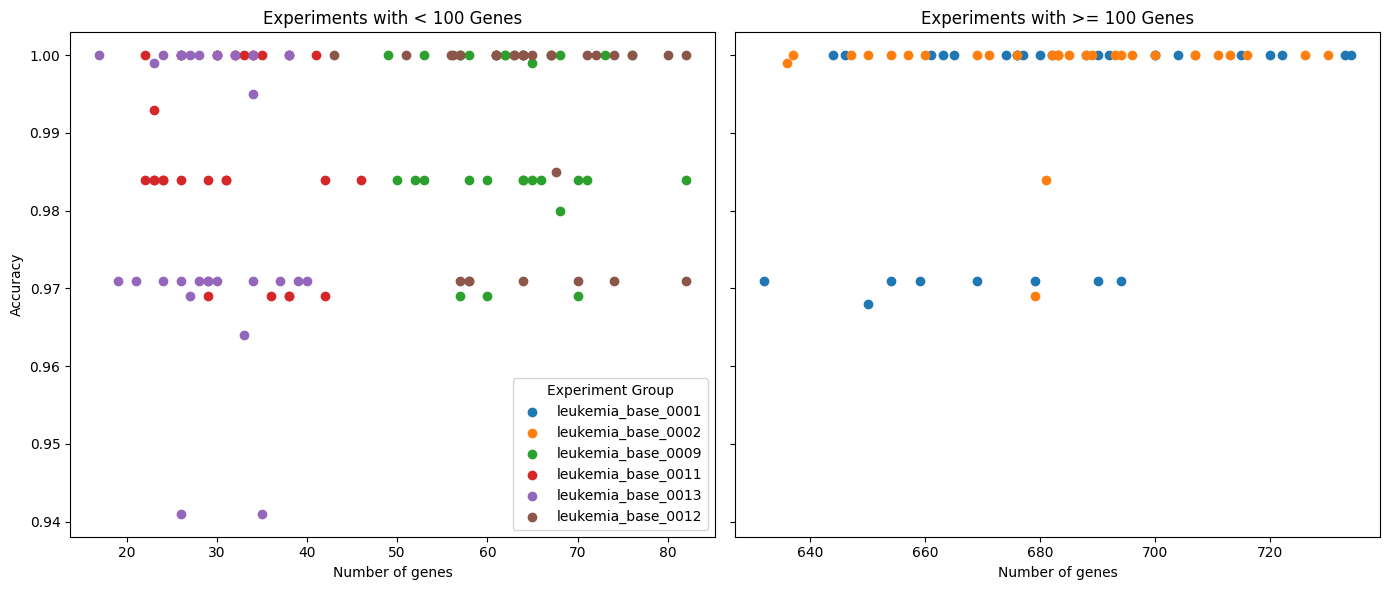

In [63]:
import matplotlib.pyplot as plt

# Factorize the 'experiment_group' to get labels and unique ids
groups, labels = pd.factorize(leukemias['experiment_group'])

# Set up the matplotlib figure and axes for two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Define the condition for splitting the data
condition = leukemias['pob_ngenes_avg'] < 100

# Plot for 'pob_ngenes_avg' below 100
for i, label in enumerate(labels):
    group_data = leukemias[(groups == i) & condition]
    axes[0].scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)
axes[0].set_title('Experiments with < 100 Genes')
axes[0].set_xlabel('Number of genes')
axes[0].set_ylabel('Accuracy')

# Plot for 'pob_ngenes_avg' above 100
for i, label in enumerate(labels):
    group_data = leukemias[(groups == i) & ~condition]
    axes[1].scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)
axes[1].set_title('Experiments with >= 100 Genes')
axes[1].set_xlabel('Number of genes')
#axes[1].set_ylabel('Accuracy')  # No need to set again, shared y-axis

# Add a legend to the first subplot (or to both if necessary)
axes[0].legend(title="Experiment Group")
# axes[1].legend(title="Experiment Group")  # Optional: add if needed for clarity

# Show plot
plt.tight_layout()  # Adjust layout to not overlap
plt.show()



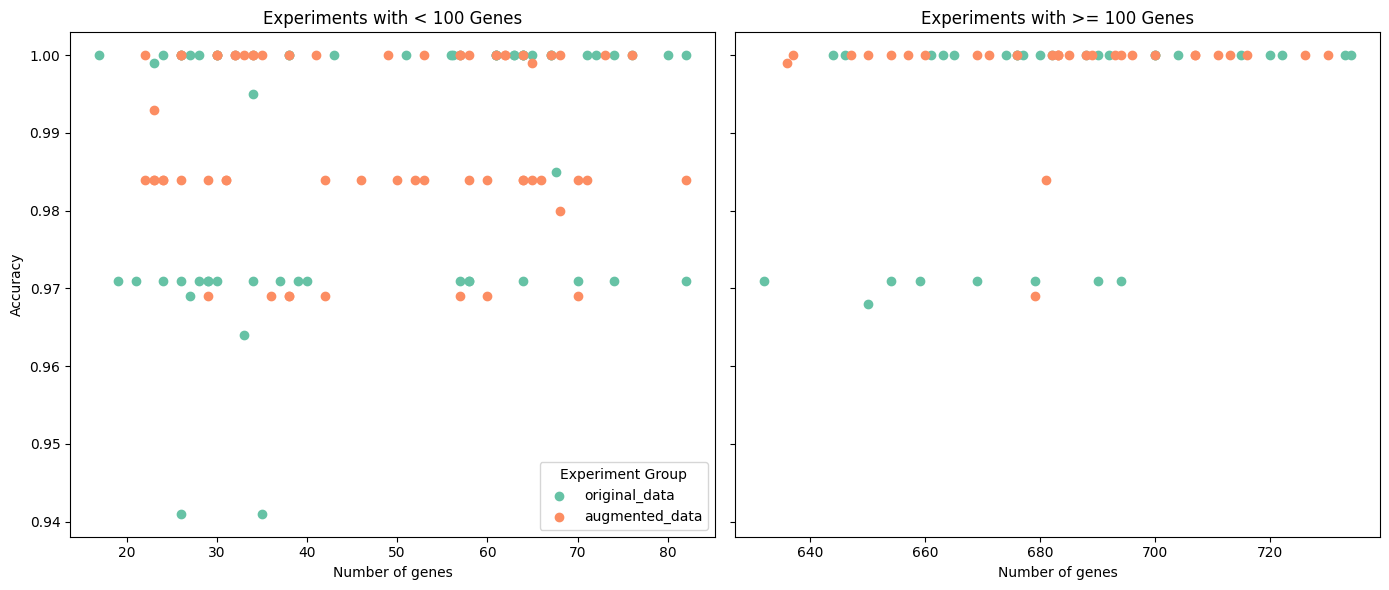

In [189]:
# Define original data group
original_data = ['leukemia_base_0001', 'leukemia_base_0012', 'leukemia_base_0013']

# set the same palette for all plots
sns.set_palette("Set2")

# Determine which group each experiment belongs to
leukemias['group'] = leukemias['experiment_group'].apply(lambda x: 'original_data' if x in original_data else 'augmented_data')

# Factorize the new 'group' column to get labels and unique ids
groups, labels = pd.factorize(leukemias['group'])

# Set up the matplotlib figure and axes for two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Define the condition for splitting the data
condition = leukemias['pob_ngenes_avg'] < 100

# Plot for 'pob_ngenes_avg' below 100
for i, label in enumerate(labels):
    group_data = leukemias[(groups == i) & condition]
    axes[0].scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)
axes[0].set_title('Experiments with < 100 Genes')
axes[0].set_xlabel('Number of genes')
axes[0].set_ylabel('Accuracy')

# Plot for 'pob_ngenes_avg' above 100
for i, label in enumerate(labels):
    group_data = leukemias[(groups == i) & ~condition]
    axes[1].scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)
axes[1].set_title('Experiments with >= 100 Genes')
axes[1].set_xlabel('Number of genes')
#axes[1].set_ylabel('Accuracy')  # No need to set again, shared y-axis

# Add a legend to the first subplot (or to both if necessary)
axes[0].legend(title="Experiment Group")
# axes[1].legend(title="Experiment Group")  # Optional: add if needed for clarity

# Show plot
plt.tight_layout()  # Adjust layout to not overlap
plt.show()

## Gráfico de resultados por grupo de experimentos

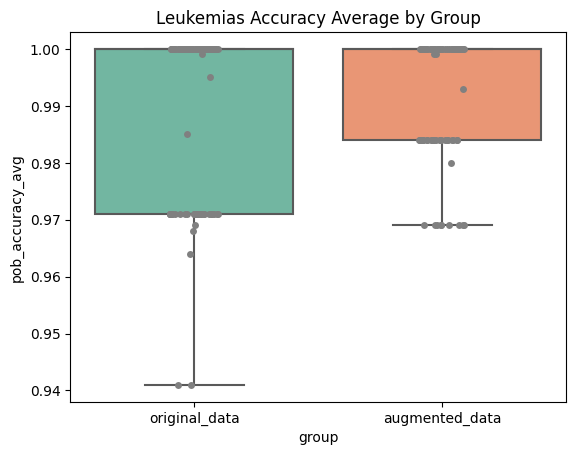

In [188]:
# plot the leukemias accuracy average by group
# set the same palette for all plots
sns.set_palette("Set2")
sns.boxplot(x='group', y='pob_accuracy_avg', data=leukemias)
# add data point in grey
sns.stripplot(x='group', y='pob_accuracy_avg', data=leukemias, color='grey')
plt.title('Leukemias Accuracy Average by Group')
plt.show()


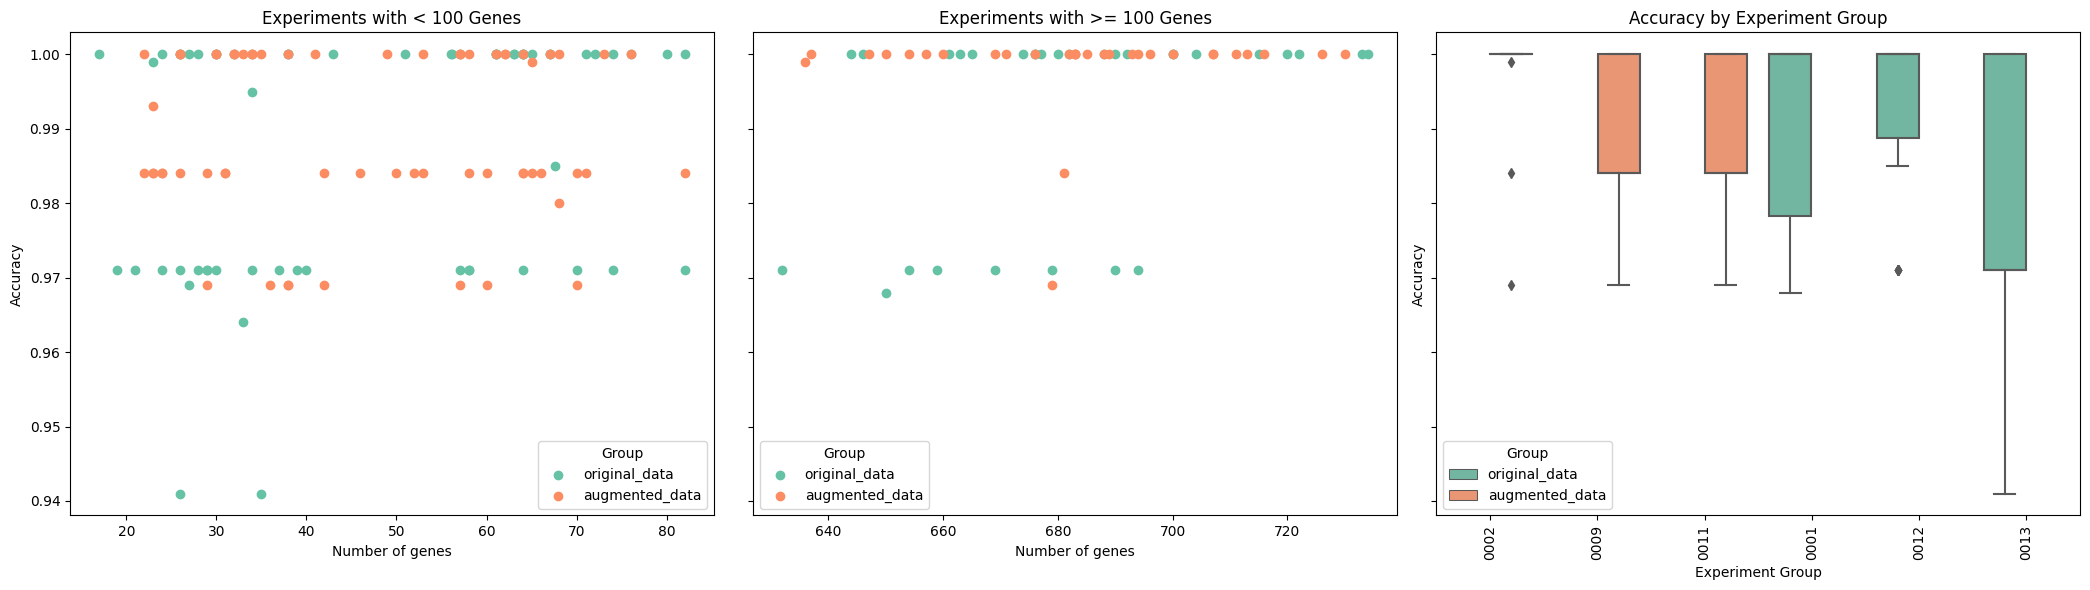

In [190]:
# Create a sort order to organize groups together
sort_order = sorted(leukemias['experiment_group'].unique(), key=lambda x: (leukemias[leukemias['experiment_group'] == x]['group'].iloc[0], x))

# set the same palette for all plots
sns.set_palette("Set2")

# Set up the matplotlib figure for the scatter plots and boxplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6), sharey=True)

# Scatter plot for 'pob_ngenes_avg' below 100
for i, label in enumerate(pd.unique(leukemias['group'])):
    group_data = leukemias[(leukemias['group'] == label) & condition]
    axes[0].scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)
axes[0].set_title('Experiments with < 100 Genes')
axes[0].set_xlabel('Number of genes')
axes[0].set_ylabel('Accuracy')

# Scatter plot for 'pob_ngenes_avg' above 100
for i, label in enumerate(pd.unique(leukemias['group'])):
    group_data = leukemias[(leukemias['group'] == label) & ~condition]
    axes[1].scatter(group_data['pob_ngenes_avg'], group_data['pob_accuracy_avg'], label=label)
axes[1].set_title('Experiments with >= 100 Genes')
axes[1].set_xlabel('Number of genes')

# Box plot grouped by experiment group and colored by 'original_data' and 'augmented_data'
sns.boxplot(x='experiment_group', y='pob_accuracy_avg', hue='group', data=leukemias, palette="Set2", ax=axes[2], order=sort_order)
axes[2].set_title('Accuracy by Experiment Group')
axes[2].set_xlabel('Experiment Group')
axes[2].set_ylabel('Accuracy')  # We can repeat the label here for clarity on the new plot
# set x lebels in 90 degree
axes[2].tick_params(axis='x', rotation=90)
#axes[2].set_xticklabels([])  # Hide x-axis labels to prevent overlap
# truncated the labels to the last 4 characters
axes[2].set_xticklabels([label[-4:] for label in sort_order])

# Adjust legend for all plots
axes[0].legend(title="Group")
axes[1].legend(title="Group")
axes[2].legend(title="Group", loc='lower left')  # Adjust the location of the legend if necessary

# Show plot
plt.tight_layout()  # Adjust layout to not overlap
plt.show()

## Obaservación 1

Entendemos que los gráficos anteriores muestran un patron: para los experimentos con datos aumentados tenemos una menor dispersión en los resultados, y una tendencia a obtener mejores resultados en comparación con los experimentos con datos originales.

In [193]:
# # from leukemas data, select the expriment group 'leukemia_base_0001' and create a boxplot of the accuracy with data points
# sns.boxplot(x='experiment_group', y='pob_accuracy_avg', data=leukemias[leukemias['experiment_group'] == 'leukemia_base_0001'])
# sns.swarmplot(x='experiment_group', y='pob_accuracy_avg', data=leukemias[leukemias['experiment_group'] == 'leukemia_base_0001'], color=".25")
# plt.title('Accuracy by Experiment Group')
# plt.xlabel('Experiment Group')
# plt.ylabel('Accuracy')
# plt.show()

# Exploración de la selección de características

En esta sección exploramos la selección de características en los experimentos buscando diferenciar entre los experimentos con datos originales y aumentados.

In [137]:
# Replace 'your_file.json' with the path to your JSON file
with open('experiments.json', 'r') as file:
    features = json.load(file)


In [138]:
for key, value in list(features.items())[:2]:
    print(f'Experiment: {key}')
    common_genome_all_prob = value['common_genome_all_prob']
    common_genome_bin = value['common_genome_bin']
    common_genome_bin_sum = value['common_genome_bin_sum']
    common_genome_prob_sum = value['common_genome_prob_sum']
    selected_features_bin = value['selected_features_bin']
    selected_features_prob = value['selected_features_prob']
    print(f'    common genome: {common_genome_all_prob[:20]}')
    print(f'    common genome len: {len(common_genome_all_prob)}')
    print(f'    common genome bin: {common_genome_bin[:20]}')
    print(f'    common genome bin len: {len(common_genome_bin)}')        
    print(f'    common genome bin sum: {common_genome_bin_sum}')
    print(f'    common genome prob sum: {common_genome_prob_sum}')
    print(f'    selected features bin: {selected_features_bin[:3]}')    
    print(f'    selected features prob: {selected_features_prob[:3]}')
    

Experiment: leukemia_base_0001_0
    common genome: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    common genome len: 7129
    common genome bin: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    common genome bin len: 7129
    common genome bin sum: 680
    common genome prob sum: 680
    selected features bin: ['AFFX-BioB-3_at', 'AFFX-ThrX-5_at', 'AFFX-ThrX-3_at']
    selected features prob: ['AFFX-BioB-3_at', 'AFFX-ThrX-5_at', 'AFFX-ThrX-3_at']
Experiment: leukemia_base_0001_1
    common genome: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    common genome len: 7129
    common genome bin: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    common genome bin len: 7129
    common genome bin sum: 700
    common genome prob sum: 700
    selected features bin: ['AFFX-TrpnX-5_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMGAPDH/M33197_5_at']
    sele

## Feature Frequency by Experiments

In [139]:
result_acc_features = []

for key, value in features.items():    
    result = {}
    selected_features_bin = value['selected_features_bin']
    experiment_name = key
    result = {'experiment_name': experiment_name, 'selected_features_bin': selected_features_bin}    
    result_acc_features.append(result)   

In [140]:
# Create a DataFrame from the list of dictionaries and add form 'data' the columns 'pob_accuracy_avg' and 'pob_ngenes_avg' using the 'experiment_name' as key
result_acc_features = pd.DataFrame(result_acc_features)
result_acc_features = result_acc_features.merge(data[['experiment_name', 'pob_accuracy_avg', 'pob_ngenes_avg']], on='experiment_name')

In [141]:
result_acc_features.head(3)

,experiment_name,selected_features_bin,pob_accuracy_avg,pob_ngenes_avg
0,leukemia_base_0001_0,"[AFFX-BioB-3_at, AFFX-ThrX-5_at, AFFX-ThrX-3_a...",1.0,680.0
1,leukemia_base_0001_1,"[AFFX-TrpnX-5_at, AFFX-HUMISGF3A/M97935_MB_at,...",1.0,700.0
2,leukemia_base_0001_2,"[AFFX-BioC-3_at, AFFX-CreX-3_st, AFFX-PheX-5_a...",1.0,674.0


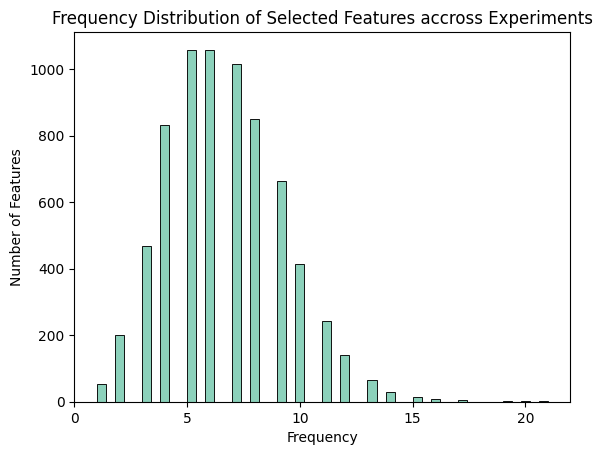

In [200]:
# combine all the selected features in a single list and plot the frequency distribution
all_features = []
for features in result_acc_features['selected_features_bin']:
    all_features.extend(features)
# Count the frequency of each feature
feature_counts = pd.Series(all_features).value_counts()
# Plot the frequency distribution
sns.histplot(feature_counts, bins=50)
plt.title('Frequency Distribution of Selected Features accross Experiments')
plt.xlabel('Frequency')
plt.ylabel('Number of Features')
# set the x-axis to integer values
plt.locator_params(axis='x', integer=True)
plt.show()

In [194]:
# create a new column group with the first 18 letters of the experiment name
result_acc_features['group'] = result_acc_features['experiment_name'].apply(lambda x: x[:18])

In [195]:
leukemia_comparables = [
    'leukemia_base_0001',
    'leukemia_base_0002',
    'leukemia_base_0009',
    'leukemia_base_0011',
    'leukemia_base_0012',
    'leukemia_base_0013',
]
# filter the data to only include the leukemia_comparables
result_acc_features = result_acc_features[result_acc_features['group'].isin(leukemia_comparables)]
result_acc_features['group'].value_counts()


group
leukemia_base_0001    30
leukemia_base_0002    30
leukemia_base_0009    30
leukemia_base_0011    30
leukemia_base_0013    30
leukemia_base_0012    30
Name: count, dtype: int64

In [144]:
# split the result_acc_feautures into two groups: original_data and augmented_data based on the list original_data
original_data = ['leukemia_base_0001', 'leukemia_base_0012', 'leukemia_base_0013']
result_acc_features['condition'] = result_acc_features['group'].apply(lambda x: 'original_data' if x in original_data else 'augmented_data')
result_acc_features_original = result_acc_features[result_acc_features['condition'] == 'original_data']
result_acc_features_augmented = result_acc_features[result_acc_features['condition'] == 'augmented_data']

In [146]:
# create a list of element and count the number of elements in the list
print(pd.Series([x[:18] for x in result_acc_features_original['group']]).value_counts())
print(pd.Series([x[:18] for x in result_acc_features_augmented['group']]).value_counts())

leukemia_base_0001    30
leukemia_base_0013    30
leukemia_base_0012    30
Name: count, dtype: int64
leukemia_base_0002    30
leukemia_base_0009    30
leukemia_base_0011    30
Name: count, dtype: int64


# Original Dataset

In [196]:
# expand the 'selected_features_bin' column into multiple rows
result_acc_features_original_long = result_acc_features_original.explode('selected_features_bin')


In [165]:
# group by the 'selected_features_bin', count the number of occurrence and concatenate the 'experiment_name' and 'pob_accuracy_avg' columns
result_acc_features_wide_original = result_acc_features_original_long.groupby('selected_features_bin').agg(
    experiment_name=('experiment_name', lambda x: ', '.join(x)),
    # create a list with the 'pob_accuracy_avg' values
    pob_accuracy_avg=('pob_accuracy_avg', list),
    # crate a list with the 'pob_ngenes_avg' values
    pob_ngenes_avg=('pob_ngenes_avg', list),
    count=('experiment_name', 'count')
).reset_index()

In [167]:
result_acc_features_wide_original.sort_values('count', ascending=False).head(3)

,selected_features_bin,experiment_name,pob_accuracy_avg,pob_ngenes_avg,count
60,AC002464_at,"leukemia_base_0001_1, leukemia_base_0001_4, le...","[1.0, 0.971, 1.0, 1.0, 1.0, 1.0, 0.971, 1.0, 1...","[700.0, 654.0, 692.0, 661.0, 720.0, 676.0, 632...",12
4624,U59632_s_at,"leukemia_base_0001_2, leukemia_base_0001_5, le...","[1.0, 1.0, 1.0, 0.968, 1.0, 1.0, 1.0, 0.971, 1...","[674.0, 688.0, 677.0, 650.0, 682.0, 720.0, 690...",12
2361,M19507_at,"leukemia_base_0001_15, leukemia_base_0001_18, ...","[1.0, 1.0, 1.0, 0.971, 0.969, 1.0, 1.0, 1.0, 1...","[720.0, 690.0, 17.0, 29.0, 27.0, 61.0, 56.0, 6...",11


In [168]:
# print the columns data types
result_acc_features_wide_original.shape


(6869, 5)

In [152]:
# save the result to a csv file
result_acc_features_wide_original.to_csv('features_occurrence_original.csv', index=False)

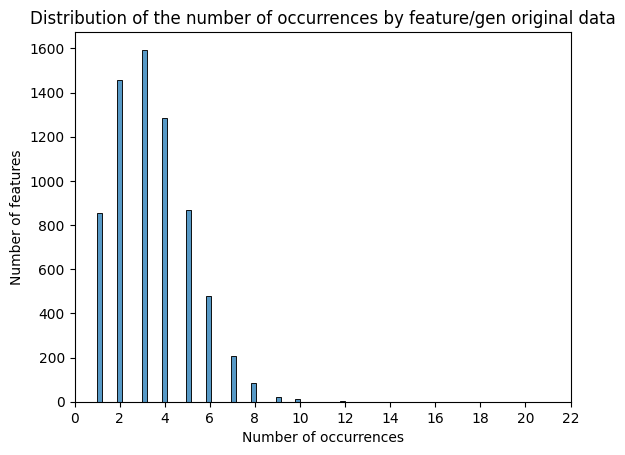

In [177]:
# plot the distribution of the count column
sns.histplot(result_acc_features_wide_original['count'], bins=50)
# make the x-axis integer values
plt.xticks(np.arange(0, 23, 2))
# set the x-axis label
plt.xlabel('Number of occurrences')
# set the y-axis label
plt.ylabel('Number of features')
# show the plot
# title of the plot
plt.title('Distribution of the number of occurrences by feature/gen original data')
plt.show()



## Gráfico de frecuencia de selección de características en los experimentos con dataset original

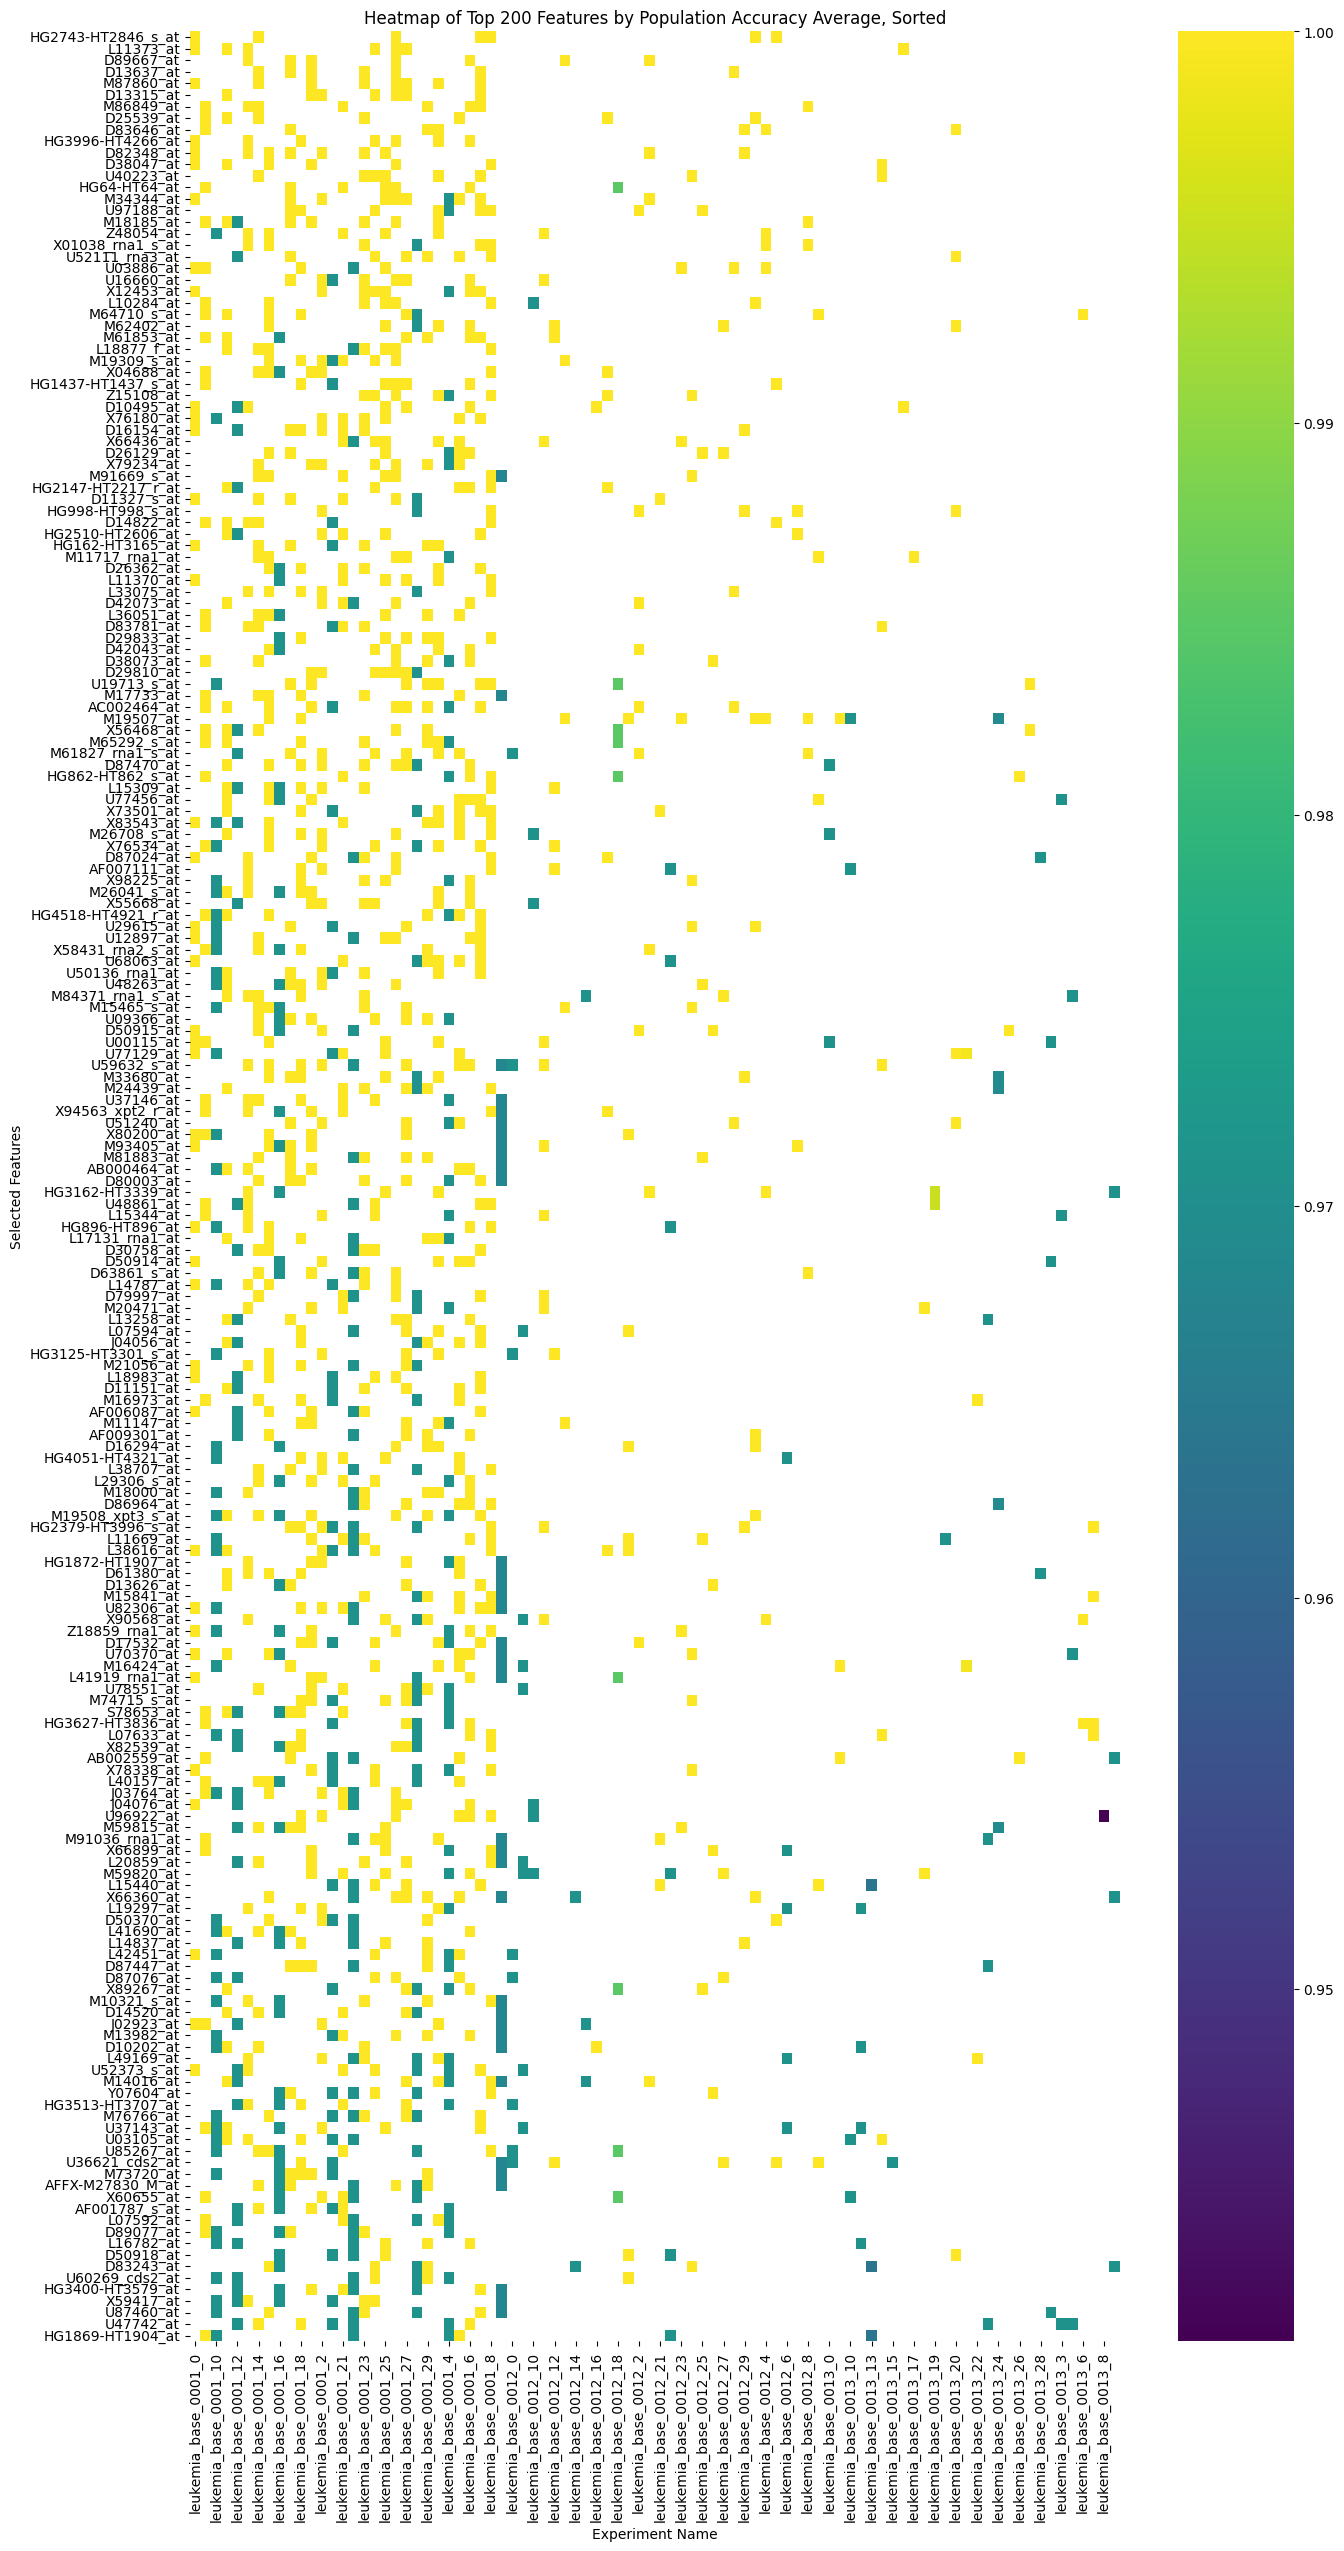

In [180]:
# Assuming the DataFrame is already loaded as df
df = result_acc_features_wide_original

# Filter the top 50 features by 'count'
top_features = df.nlargest(200, 'count')

# Expand the 'pob_accuracy_avg' and 'experiment_name' into individual rows
expanded_rows = []
for index, row in top_features.iterrows():
    accuracies = row['pob_accuracy_avg']
    experiment_names = row['experiment_name'].split(', ')
    
    if isinstance(accuracies, str):
        accuracies = eval(accuracies)

    for accuracy, exp_name in zip(accuracies, experiment_names):
        if 'leukemia_base_0008' not in exp_name.strip():
            expanded_rows.append({
                'selected_features_bin': row['selected_features_bin'],
                'pob_accuracy_avg': accuracy,
                'experiment_name': exp_name.strip()
            })

expanded_df = pd.DataFrame(expanded_rows)

# Create a pivot table for the heatmap
pivot_table = expanded_df.pivot_table(index='selected_features_bin', columns='experiment_name', values='pob_accuracy_avg', aggfunc='mean')

average_accuracy = pivot_table.mean(axis=1).sort_values(ascending=False)
sorted_pivot_table = pivot_table.loc[average_accuracy.index]

# Plot heatmap without annotations and sorted by average accuracy
plt.figure(figsize=(15, 30))  # Adjust the size accordingly
sns.heatmap(sorted_pivot_table, annot=False, cmap='viridis')
plt.title('Heatmap of Top 200 Features by Population Accuracy Average, Sorted')
plt.xlabel('Experiment Name')
# adjust the y-axis to include all the features
plt.yticks(np.arange(0.5, len(sorted_pivot_table), 1), sorted_pivot_table.index)
plt.ylabel('Selected Features')
# Save the plot to a file
plt.savefig('heatmap_top200_features_original.png', format='png', dpi=300)  # You can specify another path or format like 'pdf'
plt.show()


# Augmented Dataset

In [155]:
# expand the 'selected_features_bin' column into multiple rows
result_acc_features_augmented_long = result_acc_features_augmented.explode('selected_features_bin')
result_acc_features_augmented_long.head(3)

,experiment_name,selected_features_bin,pob_accuracy_avg,pob_ngenes_avg,group,condition
30,leukemia_base_0002_0,AFFX-BioB-M_st,1.0,685.0,leukemia_base_0002,augmented_data
30,leukemia_base_0002_0,AFFX-BioC-5_st,1.0,685.0,leukemia_base_0002,augmented_data
30,leukemia_base_0002_0,AFFX-CreX-3_st,1.0,685.0,leukemia_base_0002,augmented_data


In [170]:
# group by the 'selected_features_bin', count the number of occurrence and concatenate the 'experiment_name' and 'pob_accuracy_avg' columns
result_acc_features_wide_augmented = result_acc_features_augmented_long.groupby('selected_features_bin').agg(
    experiment_name=('experiment_name', lambda x: ', '.join(x)),
    # create a list with the 'pob_accuracy_avg' values
    pob_accuracy_avg=('pob_accuracy_avg', list),
    # crate a list with the 'pob_ngenes_avg' values
    pob_ngenes_avg=('pob_ngenes_avg', list),
    count=('experiment_name', 'count')
).reset_index()

In [171]:
result_acc_features_wide_augmented.sort_values('count', ascending=False).head(3)

,selected_features_bin,experiment_name,pob_accuracy_avg,pob_ngenes_avg,count
2387,M20203_s_at,"leukemia_base_0002_3, leukemia_base_0002_7, le...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[660.0, 682.0, 657.0, 700.0, 689.0, 730.0, 683...",14
5861,X66362_at,"leukemia_base_0002_0, leukemia_base_0002_7, le...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.969, 1.0, 1.0...","[685.0, 682.0, 694.0, 696.0, 650.0, 730.0, 679...",12
5650,X55668_at,"leukemia_base_0002_0, leukemia_base_0002_2, le...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[685.0, 683.0, 660.0, 669.0, 637.0, 671.0, 654...",12


In [172]:
# print the columns data types
result_acc_features_wide_augmented.shape


(6876, 5)

In [173]:
# save the result to a csv file
result_acc_features_wide_augmented.to_csv('features_occurrence_augmented.csv', index=False)

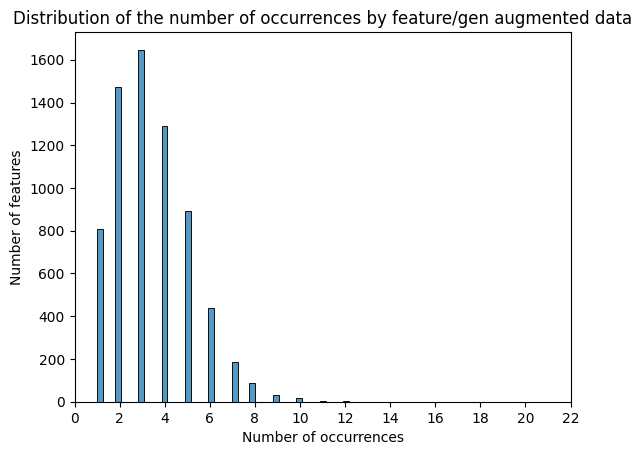

In [176]:
# plot the distribution of the count column
sns.histplot(result_acc_features_wide_augmented['count'], bins=50)
# make the x-axis integer values
plt.xticks(np.arange(0, 23, 2))
# set the x-axis label
plt.xlabel('Number of occurrences')
# set the y-axis label
plt.ylabel('Number of features')
# show the plot
# title of the plot
plt.title('Distribution of the number of occurrences by feature/gen augmented data')
plt.show()

## Gráfico de frecuencia de selección de características en los experimentos con dataset aumentado

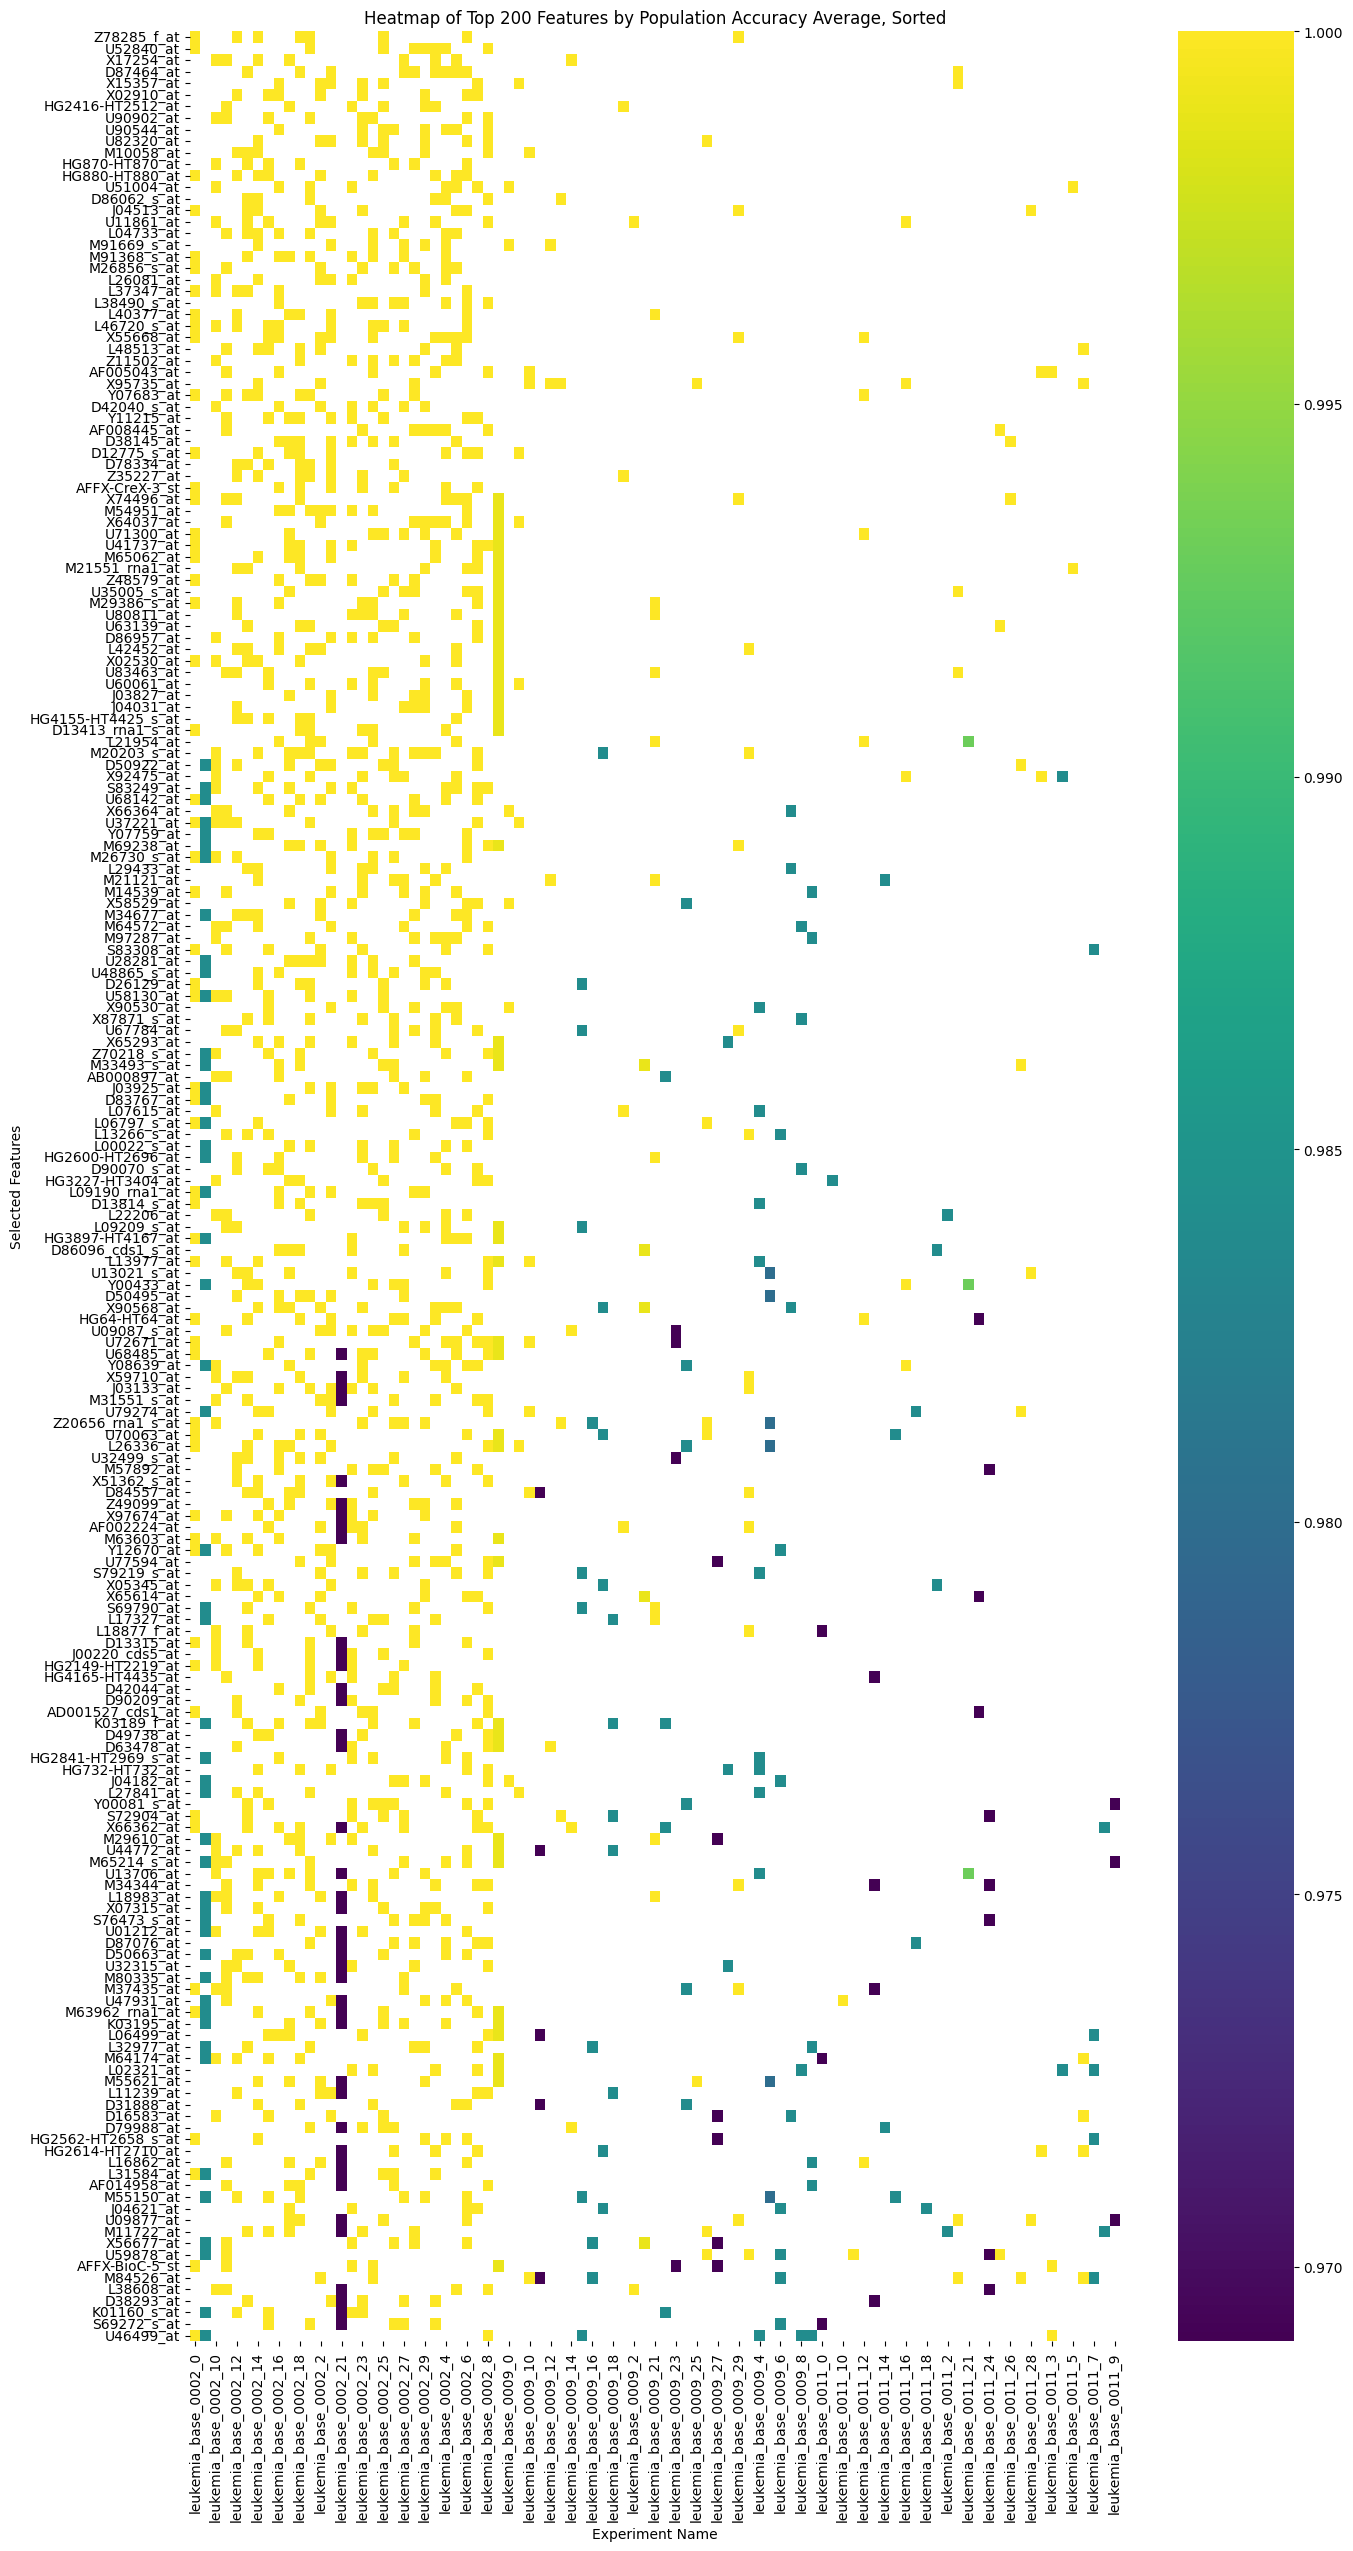

In [179]:
# Assuming the DataFrame is already loaded as df
df = result_acc_features_wide_augmented

# Filter the top 50 features by 'count'
top_features = df.nlargest(200, 'count')

# Expand the 'pob_accuracy_avg' and 'experiment_name' into individual rows
expanded_rows = []
for index, row in top_features.iterrows():
    accuracies = row['pob_accuracy_avg']
    experiment_names = row['experiment_name'].split(', ')
    
    if isinstance(accuracies, str):
        accuracies = eval(accuracies)

    for accuracy, exp_name in zip(accuracies, experiment_names):
        if 'leukemia_base_0008' not in exp_name.strip():
            expanded_rows.append({
                'selected_features_bin': row['selected_features_bin'],
                'pob_accuracy_avg': accuracy,
                'experiment_name': exp_name.strip()
            })

expanded_df = pd.DataFrame(expanded_rows)

# Create a pivot table for the heatmap
pivot_table = expanded_df.pivot_table(index='selected_features_bin', columns='experiment_name', values='pob_accuracy_avg', aggfunc='mean')

average_accuracy = pivot_table.mean(axis=1).sort_values(ascending=False)
sorted_pivot_table = pivot_table.loc[average_accuracy.index]

# Plot heatmap without annotations and sorted by average accuracy
plt.figure(figsize=(15, 30))  # Adjust the size accordingly
sns.heatmap(sorted_pivot_table, annot=False, cmap='viridis')
plt.title('Heatmap of Top 200 Features by Population Accuracy Average, Sorted')
plt.xlabel('Experiment Name')
# adjust the y-axis to include all the features
plt.yticks(np.arange(0.5, len(sorted_pivot_table), 1), sorted_pivot_table.index)
plt.ylabel('Selected Features')
# Save the plot to a file
plt.savefig('heatmap_top200_features_augmented.png', format='png', dpi=300)  # You can specify another path or format like 'pdf'
plt.show()
